**<center><h1>Basic data analysing for FENICS 1 and FENICS 2</h1></center>**
<center><p>Script to analyse FENICS1 and FENICS2 data.</p></center>

**Dependencies / Modules**

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [6]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import FenicsATL as FATL

from multiprocessing import Process




In [7]:
mpl.rcParams["figure.facecolor"] = 'white'

=====================================================================
==

**<center><h1>FENICS 1</h1></center>**

=====================================================================
=

# **I. Data**

I.1 DataFrame : `Initialization of dataframes / filtring`

In [8]:
FENICS_to_analyse = [15,14,13,12,10,9,8,7,6,5,4] #11 removed
filter_id = [15,14,13,12,10,9,8,7,6,5,4]
filter_id_slow = [15,14,13,12,10,9,8,6,5,4] #7 removed bad integrator

FENICS = FATL.FenicsData_read('/AtlasDisk/home2/sisaid/data/FENICS_data.json')



# FENICS = FATL.FilterbyUniqueChannels(FENICS)

FENICS = FENICS[FENICS.Board.specialTests ==  'None']

Fast = FATL.FenicsTestTable(FENICS,'fast')
Slow = FATL.FenicsTestTable(FENICS,'slow')

FastFeaturesToDrop = [("NoiseHG","Mean"),("NoiseHG","Mu"),
                      ("NoiseHGIG1","Mean"),("NoiseHGIG1","Mu"),
                      ("NoiseHGIG2","Mean"),("NoiseHGIG2","Mu"),
                      ("NoiseHGIG6","Mean"),("NoiseHGIG6","Mu"),
                      ("NoiseLG","Mean"),("NoiseLG","Mu"),
                      ("NoiseLGIG1","Mean"),("NoiseLGIG1","Mu"),
                      ("NoiseLGIG2","Mean"),("NoiseLGIG2","Mu"),
                      ("NoiseLGIG6","Mean"),("NoiseLGIG6","Mu")]

for feature in FastFeaturesToDrop:
    Fast = Fast.drop(feature, axis=1) 

slow_index = Slow.index
Slow.dropna(subset=[('Gain3','Linearity','SlopeLin'),('Gain4','Linearity','SlopeLin'),('Gain5','Linearity','SlopeLin')], inplace=True)
Slow.dropna(inplace=True,axis=1)
Fast.drop(index=slow_index.difference(Slow.index), inplace=True)
FENICS.drop(index=slow_index.difference(Slow.index), inplace=True)

FastSlow = pd.concat([Slow, Fast], axis=1)
# Slow = FATL.Normalizer(Slow)
# Fast = FATL.Normalizer(Fast)


# **II. Statistics**

I.1 Macro statistics  : `Calculations`

In [5]:
descriptions = {}
for id in filter_id :
    id_filter = FENICS[FENICS.Board.id == id].index
    descriptions [id] = Fast.loc[id_filter].describe()

In [6]:
descriptions;

# **III. Basic plots**

III.1 Data jitter : `Plots`

In [ ]:
for progress,columns in enumerate(Fast.columns) :
    FATL.FenSpread(FENICS,Fast,columns,FENICS_to_analyse,
                   path ='/users/divers/atlas/sisaid/home2/fen1_output/dataSpreader/fast/svg',burns = True)
    FATL.loadingBar(progress,len(Fast.columns),suffix=str(columns))
    
for progress,columns in enumerate(Slow.columns) :
    FATL.FenSpread(FENICS,Slow,columns,FENICS_to_analyse,
                   path ='/users/divers/atlas/sisaid/home2/fen1_output/dataSpreader/slow/svg',burns = True)
    FATL.loadingBar(progress,len(Slow.columns),suffix=str(columns))

In [18]:
custom_filter = [('Combo',dict(labels_filter=[1,4,5,6,7,8,9,10,11,12,13,14,15],
                               radio_categories=[dict(name = 'FEN1',indexes=[1,3,4,5,6,7,8,9,10,11,12,13,14,15]),
                                                 dict(name = 'Fail',indexes=[1,11]),
                                                 ]))]

for progress,columns in enumerate(Fast.columns) :
    plot = FATL.FenBokehGrapher(FENICS.Board.id,Fast[columns],FENICS.Board.version,FENICS.Board.id,FENICS.Board.burnTime,
                                colors=FENICS.Board.burnTime ,labels=FENICS.Board.id,tooltips=[("card","FENICS0@version"),("id","@id"),("burnTime","@burnTime")])
    plot.plotter(plotType='scatter',filters=custom_filter,
                title=f'{columns} : Fast data jitter',linear_fit=False,showGraph=False)
    
    plot.save_as_html(path='/users/divers/atlas/sisaid/home2/fen1_output/dataSpreader/fast/HTML',filename=f'{columns}_dataSpread')
    FATL.loadingBar(progress,len(Fast.columns),suffix=str(columns))
    
for progress,columns in enumerate(Slow.columns) :
    plot = FATL.FenBokehGrapher(FENICS.Board.id,Slow[columns],FENICS.Board.version,FENICS.Board.id,FENICS.Board.burnTime,
                                colors=FENICS.Board.burnTime ,labels=FENICS.Board.id,tooltips=[("card","FENICS0@version"),("id","@id"),("burnTime","@burnTime")])
    plot.plotter(plotType='scatter',filters=custom_filter,
                title=f'{columns} : Slow data jitter',linear_fit=False,showGraph=False)
    
    plot.save_as_html(path='/users/divers/atlas/sisaid/home2/fen1_output/dataSpreader/slow/HTML',filename=f'{columns}_dataSpread')
    FATL.loadingBar(progress,len(Slow.columns),suffix=str(columns))

 Created folder at /users/divers/atlas/sisaid/home2/test01/dataSpreader/fast/HTML
|                                                  | progress: 100%                                                                                   DONE 
 Created folder at /users/divers/atlas/sisaid/home2/test01/dataSpreader/slow/HTML
|                                                  | progress: 100%                                                                                   DONE 


III.2 BurnTime evolution plots  : `Plots`

In [8]:
for progress,columns in enumerate(Fast.columns):
    FATL.FenBurnEvol(FENICS,Fast,columns,filter_id_slow,separate = False,LR=True,sigma=2 , unique=True, fileFormat='jpeg'
                           ,path ='/users/divers/atlas/sisaid/home2/test01/burnTimeEvolution_nsep_nlr/fast')
    FATL.loadingBar(progress,len(Fast.columns),suffix=str(columns))

for progress,columns in enumerate(Slow.columns):
    FATL.FenBurnEvol(FENICS,Slow,columns,filter_id_slow,separate = False,LR=True,sigma=2 , unique=True, fileFormat='jpeg'
                           ,path ='/users/divers/atlas/sisaid/home2/test01/burnTimeEvolution_nsep_nlr/slow')
    FATL.loadingBar(progress,len(Slow.columns),suffix=str(columns))


|                                                  | progress: 100%                                                                                   DONE 
|                                                  | progress: 100%                                                                                   DONE 


In [10]:
FATL.FenBurnEvol(FENICS,Slow,('Gain2','Linearity','ConstLin'),filter_id,separate = True,LR=True,sigma=2 , unique=True, fileFormat='svg'
                           ,path ='/users/divers/atlas/sisaid/home2/test01/burnTimeEvolution_nsep/fast/svg')

In [ ]:
for progress,columns in enumerate(Fast.columns):
    plot = FATL.FenBokehGrapher(FENICS.Board.burnTime,Fast[columns],FENICS.Board.version,FENICS.Board.id,FENICS.Board.burnTime,
                                colors=FENICS.Board.burnTime ,labels=FENICS.Board.id,
                                tooltips=[("card","FENICS0@version"),("id","@id"),("burnTime","@burnTime")])
                    
    plot.plotter(plotType='scatter',filters=custom_filter,
                                axis_xlabel='burntime in (hours)', axis_ylabel=str(columns),
                                title=f'{columns} vs burnTime evolution',linear_fit=True,showGraph=False)
                    
    plot.save_as_html(path=f'/users/divers/atlas/sisaid/home2/fen1_output/burnTimeEvolution/fast/html',filename=f'{columns}_burnTime_evolution')
    FATL.loadingBar(progress,len(Fast.columns),suffix=str(columns))

for progress,columns in enumerate(Slow.columns):
    plot = FATL.FenBokehGrapher(FENICS.Board.burnTime,Slow[columns],FENICS.Board.version,FENICS.Board.id,FENICS.Board.burnTime,
                                colors=FENICS.Board.burnTime ,labels=FENICS.Board.id,
                                tooltips=[("card","FENICS0@version"),("id","@id"),("burnTime","@burnTime")])
                    
    plot.plotter(plotType='scatter',filters=custom_filter,
                                axis_xlabel='burntime in (hours)', axis_ylabel=str(columns),
                                title=f'{columns} vs burnTime evolution',linear_fit=True,showGraph=False)
                    
    plot.save_as_html(path=f'/users/divers/atlas/sisaid/home2/fen1_output/burnTimeEvolution/slow/html',filename=f'{columns}_burnTime_evolution')
    FATL.loadingBar(progress,len(Slow.columns),suffix=str(columns))


|                                                  | progress: 100%                                                                                   DONE 
|                                                  | progress: 100%                                                                                   DONE 


In [18]:
Slow.Gain0

Linearity                                                             \
     SlopeLin    ConstLin DACforPed LowGoodLin LowGoodNoise     MaxNoise   
0    4.800434 -188.921000      12.0  26.761246    43.172694   819.880946   
14   4.799460 -183.981737      12.0  43.189955    43.189955   517.698413   
15   4.798435 -183.873415      12.0  43.100905    43.100905   465.901513   
16   4.800720 -192.894693      13.0  39.806513    39.806513   691.522033   
17   4.800354 -195.343029      13.0  39.857938    39.857938   704.875411   
..        ...         ...       ...        ...          ...          ...   
642  4.781448  -37.443464       3.0  22.333511    35.927957   465.780581   
643  4.803592 -106.774218       8.0  40.017442    56.365429  1218.655221   
657  4.806502 -100.247719       7.0  43.409787    43.409787   468.000341   
658  4.805978 -100.674479       7.0  59.686420    43.384617   475.393798   
659  4.805787 -104.174671       8.0  56.347346    40.114675   448.107438   

    NoisePhys             NoisePosPed                               
        Sigma Mean StdDev          Mu     Sigma     Mean    StdDev  
0         0.0  0.0    0.0    3.903257  0.890116   3.9044  0.900256  
14        0.0  0.0    0.0    9.003022  0.819517   9.0031  0.834081  
15        0.0  0.0    0.0    8.784429  0.819769   8.7699  0.844011  
16        0.0  0.0    0.0   15.409559  0.566356  15.5140  0.716801  
17        0.0  0.0    0.0   12.963757  0.795069  12.9641  0.812780  
..        ...  ...    ...         ...       ...      ...       ...  
642       0.0  0.0    0.0    6.656124  0.574618   6.5854  0.687391  
643       0.0  0.0    0.0   30.682764  0.588138  30.5941  1.246172  
657       0.0  0.0    0.0    6.624409  0.627770   6.5516  0.727831  
658       0.0  0.0    0.0    5.665712  0.771768   5.6806  0.800490  
659       0.0  0.0    0.0   16.864345  0.752623  16.8590  0.770272  

[500 rows x 13 columns]

In [27]:
custom_filter = [('Combo',dict(labels_filter=[1,4,5,6,7,8,9,10,11,12,13,14,15],
                               radio_categories=[dict(name = 'FEN1',indexes=[1,3,4,5,6,7,8,9,10,11,12,13,14,15]),
                                                 dict(name = 'Fail',indexes=[1,11]),
                                                 ]))]
plot = FATL.FenBokehGrapher(Slow[('Gain5','Linearity','MaxNoise')],Slow[('Gain1','Linearity','MaxNoise')],FENICS.Board.version,FENICS.Board.id,FENICS.Board.burnTime,
                                colors=FENICS.Board.burnTime ,labels=FENICS.Board.id,
                                tooltips=[("card","FENICS0@version"),("id","@id"),("burnTime","@burnTime")])
                    
plot.plotter(plotType='scatter',filters=custom_filter,
                                axis_xlabel="('Gain5','Linearity','MaxNoise')", axis_ylabel="('Gain1','Linearity','MaxNoise')",
                                title="('Gain5','Linearity','MaxNoise') vs ('Gain1','Linearity','MaxNoise')",linear_fit=True,showGraph=True)


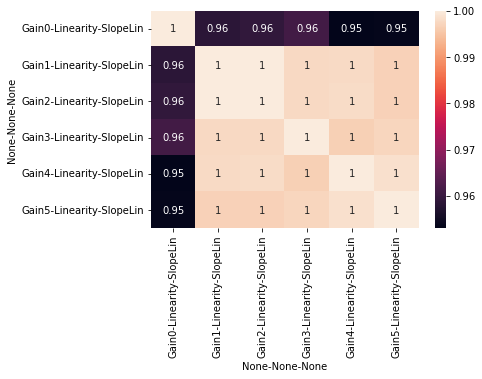

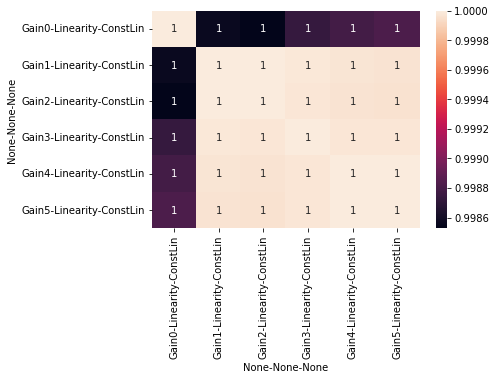

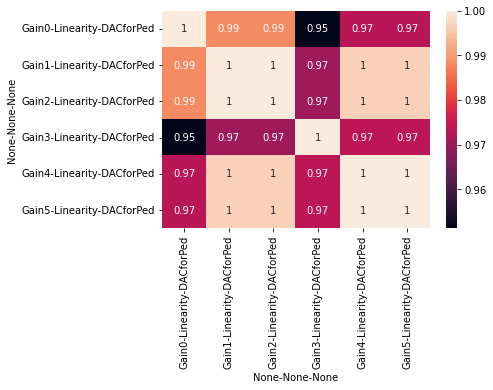

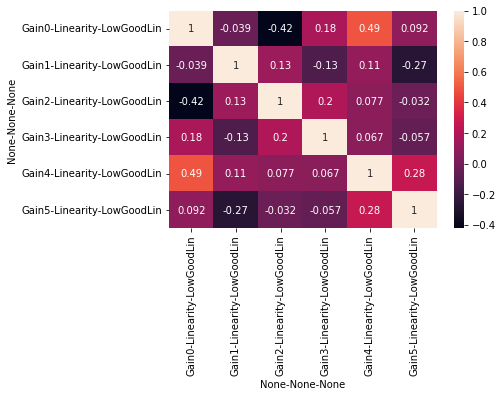

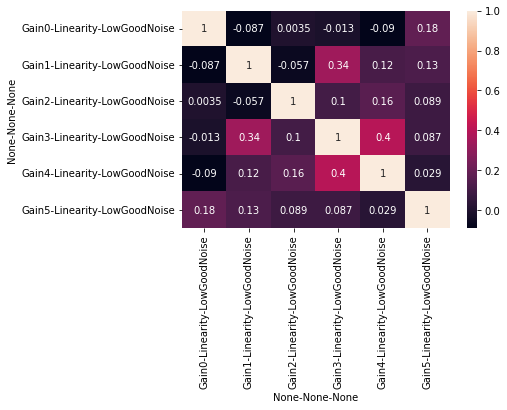

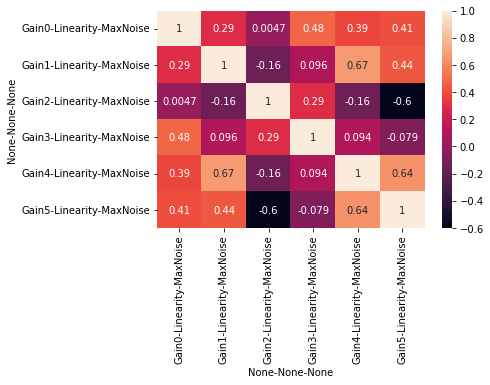

In [26]:
import seaborn as sns
gains = [0,1,2,3,4,5]
for subsubcol in Slow.Gain0.Linearity.columns :
    features = []
    features = [(f'Gain{i}','Linearity',subsubcol) for i in gains]
    Corr = Slow[FENICS.Board.id == 5][features]
    ax = plt.axes()
    sns.heatmap(Corr.corr(), annot=True)
    plt.show()



III.3 Histograms : `Plots`

In [ ]:
for progress,columns in enumerate(Fast.columns):
    FATL.FenHist(FENICS,Fast,columns,filter_id,separate = True
                           ,path ='/users/divers/atlas/sisaid/home2/fen1_output/histogramsp/fast/image')
    FATL.loadingBar(progress,len(Fast.columns),suffix=str(columns))

for progress,columns in enumerate(Slow.columns):
    FATL.FenHist(FENICS,Slow,columns,filter_id_slow,separate = True
                           ,path ='/users/divers/atlas/sisaid/home2/fen1_output/histograms/slow/image')
    FATL.loadingBar(progress,len(Slow.columns),suffix=str(columns))

 Created folder at /users/divers/atlas/sisaid/home2/fen1_output/histogramsp/fast/image
|                                                  | progress: 100%                                                                                   DONE 
 Created folder at /users/divers/atlas/sisaid/home2/fen1_output/histograms/slow/image
|                                                  | progress: 100%                                                                                   DONE 


# **IV. Correlations**

IV.1 Correlations of all features : `Calculations`


In [ ]:
corrThreshold = 0.9
corrMatch = {}
for id in filter_id :
    corrMatch[id] = (Fast.loc[FENICS[FENICS.Board.id==id].index].corr()>corrThreshold).sum().sum()

IV.2 Correlations of all features : `Plots : w/out burns`

In [ ]:

doMultiprocessing = False
sigma = 4
corrThreshold = 0.9
def FenicsFastCorr():
    FastCorrFilter = Fast.loc[FATL.dropOutSigma(FENICS,Fast,sigma,filter_id=False)].corr()>corrThreshold
    for progress,ii in enumerate(range(len(FastCorrFilter.columns))):
        FATL.loadingBar(progress,len(FastCorrFilter.columns),suffix=str(ii))
        for jj in range(ii+1, len(FastCorrFilter.columns)):
            if FastCorrFilter.iloc[ii, jj] and FastCorrFilter.columns[ii] != FastCorrFilter.columns[jj]:
                FATL.FenCorr(FENICS.loc[FATL.dropOutSigma(FENICS,Fast,sigma,filter_id=False)],
                                        Fast.loc[FATL.dropOutSigma(FENICS,Fast,sigma,filter_id=False)]
                                        ,FastCorrFilter.columns[ii],FastCorrFilter.columns[jj]
                                        ,filter_id,LR=False,separate = False, burns=True , burns_filter = None,
                                        path ='/users/divers/atlas/sisaid/home2/fen1_output/correlation_nsep_wburn/fast')
    
    
def FenicsSlowCorr():
    SlowCorrFilter = Slow.loc[FATL.dropOutSigma(FENICS,Slow,sigma,filter_id=False)].corr()>corrThreshold
    for progress,ii in enumerate(range(len(SlowCorrFilter.columns))):
        FATL.loadingBar(progress,len(SlowCorrFilter.columns),suffix=str(ii))
        for jj in range(ii+1, len(SlowCorrFilter.columns)):
            if SlowCorrFilter.iloc[ii, jj] and SlowCorrFilter.columns[ii] != SlowCorrFilter.columns[jj]:
                FATL.FenCorr(FENICS.loc[FATL.dropOutSigma(FENICS,Slow,sigma,filter_id=False)],
                                        Slow.loc[FATL.dropOutSigma(FENICS,Slow,sigma,filter_id=False)],
                                        SlowCorrFilter.columns[ii],SlowCorrFilter.columns[jj],
                                        filter_id_slow,LR=False,separate = False, burns=True, burns_filter = None,
                                        path ='/users/divers/atlas/sisaid/home2/fen1_output/correlation_nsep_wburn/slow')
    
    
if doMultiprocessing :
    if __name__ == '__main__':
      p1 = Process(target=FenicsFastCorr)
      p1.start()
      p2 = Process(target=FenicsSlowCorr)
      p2.start()
      p1.join()
      p2.join()
else :
    FenicsFastCorr()
    FenicsSlowCorr()
    doMultiprocessing = False

In [ ]:

doMultiprocessing = False
sigma = 4
corrThreshold = 0.9
def FenicsFastCorr():
    FastCorrFilter = Fast.loc[FATL.dropOutSigma(FENICS,Fast,sigma,filter_id=False)].corr()>corrThreshold
    for progress,ii in enumerate(range(len(FastCorrFilter.columns))):
        FATL.loadingBar(progress,len(FastCorrFilter.columns),suffix=str(ii))
        for jj in range(ii+1, len(FastCorrFilter.columns)):
            if FastCorrFilter.iloc[ii, jj] and FastCorrFilter.columns[ii] != FastCorrFilter.columns[jj]:
                plot = FATL.FenBokehGrapher(Fast[FastCorrFilter.columns[ii]],Fast[FastCorrFilter.columns[jj]],FENICS.Board.version,FENICS.Board.id,FENICS.Board.burnTime,
                                colors=FENICS.Board.burnTime ,labels=FENICS.Board.id,
                                tooltips=[("card","FENICS0@version"),("id","@id"),("burnTime","@burnTime")])
                    
                plot.plotter(plotType='scatter',filters=custom_filter,
                                axis_xlabel=str(Fast.columns[ii]), axis_ylabel=str(Fast.columns[jj]),
                                title=f'{FastCorrFilter.columns[ii]} {FastCorrFilter.columns[jj]} correlation',linear_fit=False,showGraph=False)
                    
                plot.save_as_html(path=f'/users/divers/atlas/sisaid/home2/fen1_output/correlation_nsep_wburn/fast/',filename=f'{Fast.columns[ii]}_{Fast.columns[jj]}_correlation')
    
    
def FenicsSlowCorr():
    SlowCorrFilter = Slow.loc[FATL.dropOutSigma(FENICS,Slow,sigma,filter_id=False)].corr()>corrThreshold
    for progress,ii in enumerate(range(len(SlowCorrFilter.columns))):
        FATL.loadingBar(progress,len(SlowCorrFilter.columns),suffix=str(ii))
        for jj in range(ii+1, len(SlowCorrFilter.columns)):
            if SlowCorrFilter.iloc[ii, jj] and SlowCorrFilter.columns[ii] != SlowCorrFilter.columns[jj]:
                plot = FATL.FenBokehGrapher(Slow[SlowCorrFilter.columns[ii]],Slow[SlowCorrFilter.columns[jj]],FENICS.Board.version,FENICS.Board.id,FENICS.Board.burnTime,
                                colors=FENICS.Board.burnTime ,labels=FENICS.Board.id,
                                tooltips=[("card","FENICS0@version"),("id","@id"),("burnTime","@burnTime")])
                    
                plot.plotter(plotType='scatter',filters=custom_filter,
                                axis_xlabel=str(SlowCorrFilter.columns[ii]), axis_ylabel=str(SlowCorrFilter.columns[jj]),
                                title=f'{SlowCorrFilter.columns[ii]} {SlowCorrFilter.columns[jj]} correlation',linear_fit=False,showGraph=False)
                    
                plot.save_as_html(path=f'/users/divers/atlas/sisaid/home2/fen1_output/correlation_nsep_wburn/slow/',filename=f'{Fast.columns[ii]}_{Fast.columns[jj]}_correlation')
    
    
if doMultiprocessing :
    if __name__ == '__main__':
      p1 = Process(target=FenicsFastCorr)
      p1.start()
      p2 = Process(target=FenicsSlowCorr)
      p2.start()
      p1.join()
      p2.join()
else :
    FenicsFastCorr()
    FenicsSlowCorr()
    doMultiprocessing = False

|                                                  | progress: 100%                                                                                   DONE 
|                                                  | progress: 100%                                                                                   DONE 


IV.3.b Correlations per FENICS card of all features : `Plots w/burns`

In [ ]:
doMultiprocessing = False

def FastCorrPerFenicsWBurn():
    for progress,id in enumerate(filter_id) :
        FATL.loadingBar(progress,len(filter_id),prefix='FENICS : ' + str(id))
        index_sigma_id_filtred = FATL.dropOutSigma(FENICS,Fast,4,filter_id=[id])
        FastCorrFilter = Fast.loc[index_sigma_id_filtred].corr()>corrThreshold  
        for ii in range(len(FastCorrFilter.columns)):
            for jj in range(ii+1, len(FastCorrFilter.columns)):
                if FastCorrFilter.iloc[ii, jj] and FastCorrFilter.columns[ii] != FastCorrFilter.columns[jj]:
                    FATL.FenCorr(FENICS.loc[index_sigma_id_filtred],Fast.loc[index_sigma_id_filtred],FastCorrFilter.columns[ii],FastCorrFilter.columns[jj],[id],burns=True,
                                                    path =f'/users/divers/atlas/sisaid/home2/fen1_output/correlation_per_id_burntime/{str(id)}/Fast')
        
def SlowCorrPerFenicsWBurn():
    for i,id in enumerate(filter_id_slow) :
        FATL.loadingBar(i,len(filter_id_slow),prefix='FENICS : ' + str(id))
        index_sigma_id_filtred = FATL.dropOutSigma(FENICS,Slow,4,filter_id=[id])
        SlowCorrFilter = Slow.iloc[FENICS[FENICS.Board.id==id].index].corr()>corrThreshold      
        for ii in range(len(SlowCorrFilter.columns)):
            for jj in range(ii+1, len(SlowCorrFilter.columns)):
                if SlowCorrFilter.iloc[ii, jj] and SlowCorrFilter.columns[ii] != SlowCorrFilter.columns[jj]:
                    FATL.FenCorr(FENICS.loc[index_sigma_id_filtred],Slow.loc[index_sigma_id_filtred],SlowCorrFilter.columns[ii],SlowCorrFilter.columns[jj],[id],burns=True,
                                                    path =f'/users/divers/atlas/sisaid/home2/fen1_output/correlation_per_id_burntime/{str(id)}/Slow')
        


if doMultiprocessing :
    if __name__ == '__main__':
      p1 = Process(target=FastCorrPerFenicsWBurn)
      p1.start()
      p2 = Process(target=SlowCorrPerFenicsWBurn)
      p2.start()
      p1.join()
      p2.join()
      doMultiprocessing = False
else :
    FastCorrPerFenicsWBurn()
    SlowCorrPerFenicsWBurn()
    

In [ ]:
doMultiprocessing = False

def FastCorrPerFenicsWBurn():
    for progress,id in enumerate(filter_id) :
        
        FATL.loadingBar(progress,len(filter_id),prefix='FENICS : ' + str(id))
        FastCorrFilter = Fast.loc[FENICS[FENICS.Board.id==id].index].corr()>corrThreshold  
        
        for ii in range(len(FastCorrFilter.columns)):
            
            for jj in range(ii+1, len(FastCorrFilter.columns)):
                
                if FastCorrFilter.iloc[ii, jj] and FastCorrFilter.columns[ii] != FastCorrFilter.columns[jj]:
                    
                    plot = FATL.FenBokehGrapher(Fast[Fast.columns[ii]],Fast[Fast.columns[jj]],FENICS.Board.version,FENICS.Board.id,FENICS.Board.burnTime,
                                colors=FENICS.Board.burnTime ,labels=FENICS.Board.id,
                                tooltips=[("card","FENICS0@version"),("id","@id"),("burnTime","@burnTime")])
                    
                    plot.plotter(plotType='scatter',filters=custom_filter,
                                axis_xlabel=str(Fast.columns[ii]), axis_ylabel=str(Fast.columns[jj]),
                                title=f'{Fast.columns[ii]} {Fast.columns[jj]} correlation',linear_fit=False,showGraph=False)
                    
                    plot.save_as_html(path=f'/users/divers/atlas/sisaid/home2/fen1_output/correlation_per_id_burntime/{str(id)}/Fast/',filename=f'{Fast.columns[ii]}_{Fast.columns[jj]}_correlation')
                    
        
def SlowCorrPerFenicsWBurn():
    for i,id in enumerate(filter_id_slow) :
        
        FATL.loadingBar(i,len(filter_id_slow),prefix='FENICS : ' + str(id))
        SlowCorrFilter = Slow.loc[FENICS[FENICS.Board.id==id].index].corr()>corrThreshold
              
        for ii in range(len(SlowCorrFilter.columns)):
            
            for jj in range(ii+1, len(SlowCorrFilter.columns)):
                
                if SlowCorrFilter.iloc[ii, jj] and SlowCorrFilter.columns[ii] != SlowCorrFilter.columns[jj]:
                    plot = FATL.FenBokehGrapher(Slow[Slow.columns[ii]],Slow[Slow.columns[jj]],FENICS.Board.version,FENICS.Board.id,FENICS.Board.burnTime,
                                colors=FENICS.Board.burnTime ,labels=FENICS.Board.id,
                                tooltips=[("card","FENICS0@version"),("id","@id"),("burnTime","@burnTime")])
                    
                    plot.plotter(plotType='scatter',filters=custom_filter,
                                title=f'{Slow.columns[ii]} {Slow.columns[jj]} correlation',
                                axis_xlabel=str(Slow.columns[ii]), axis_ylabel=str(Slow.columns[jj]),
                                linear_fit=False,showGraph=False)
                    
                    plot.save_as_html(path=f'/users/divers/atlas/sisaid/home2/fen1_output/correlation_per_id_burntime/{str(id)}/Slow/',filename=f'{Slow.columns[ii]}_{Slow.columns[jj]}_correlation')
        


if doMultiprocessing :
    if __name__ == '__main__':
      p1 = Process(target=FastCorrPerFenicsWBurn)
      p1.start()
      p2 = Process(target=SlowCorrPerFenicsWBurn)
      p2.start()
      p1.join()
      p2.join()
      doMultiprocessing = False
else :
    FastCorrPerFenicsWBurn()
    SlowCorrPerFenicsWBurn()
    

FENICS : 4|                                                  | progress: 100%   DONE 
FENICS : 6|                                                  | progress: 77% Created folder at /users/divers/atlas/sisaid/home2/fen1_output/correlation_per_id_burntime/6/Slow/
FENICS : 5|                                                  | progress: 88% Created folder at /users/divers/atlas/sisaid/home2/fen1_output/correlation_per_id_burntime/5/Slow/
FENICS : 4|                                                  | progress: 100%   DONE 
Created folder at /users/divers/atlas/sisaid/home2/fen1_output/correlation_per_id_burntime/4/Slow/


IV.4. Correlations of all features with burnTime : `Calculations`

In [ ]:
SlowTableOfCorrelations = {}
FastTableOfCorrelations = {}

for progress,columns in enumerate(Fast.columns) :
    FastTableOfCorrelations [columns] = {}
    for id in filter_id :
        index_id = FATL.dropOutSigma(FENICS,Fast,4,filter_id=[id])
        FastTableOfCorrelations[columns][id] = FENICS.loc[index_id].Board.burnTime.corr(Fast.loc[index_id][columns])
    FATL.loadingBar(progress,len(Fast.columns),suffix=str(columns) + str(id))
  
for progress,columns in enumerate(Slow.columns) :
    SlowTableOfCorrelations [columns] = {}
    for id in filter_id_slow :
        index_id = FATL.dropOutSigma(FENICS,Slow,4,filter_id=[id])
        SlowTableOfCorrelations[columns][id] = FENICS.loc[index_id].Board.burnTime.corr(Slow.loc[index_id][columns])
    
    FATL.loadingBar(progress,len(Slow.columns),suffix=str(columns) + str(id))
        
FastBurnCorrelation = pd.DataFrame(FastTableOfCorrelations)
SlowBurnCorrelation = pd.DataFrame(SlowTableOfCorrelations)

|                                                  | progress: 100%                                                                                   DONE 
|                                                  | progress: 100%                                                                                   DONE 
|                                                  | progress: 100%                                                                                   DONE 
|                                                  | progress: 100%                                                                                   DONE 
|                                                  | progress: 100%                                                                                   DONE 
|                                                  | progress: 100%                                                                                   DONE 
|                                                  | progress: 1

IV.4.b Correlations of all features with burnTime : `Plots`

In [ ]:
FastBurnCorrelation_ = FastBurnCorrelation<-0.5
for progress,columns in enumerate(FastBurnCorrelation_.columns):
    if FastBurnCorrelation_[columns].sum() >= 3 :
        FATL.FenBurnEvol(FENICS,Fast,columns,filter_id
                                ,path ='/users/divers/atlas/sisaid/home2/fen1_output/plots_test_fast',separate=False,burns=False,LR=True)
        FATL.loadingBar(progress,len(FastBurnCorrelation_.columns),suffix=str(columns))
        
SlowBurnCorrelation_ = SlowBurnCorrelation<-0.5       
for progress,columns in enumerate(SlowBurnCorrelation_.columns):
    if SlowBurnCorrelation_[columns].sum() >= 3 :
        FATL.FenBurnEvol(FENICS,Slow,columns,filter_id
                                ,path ='/users/divers/atlas/sisaid/home2/fen1_output/plots_test_slow',separate=False,burns=False,LR=True)
        FATL.loadingBar(progress,len(SlowBurnCorrelation_.columns),suffix=str(columns))

In [ ]:
FastBurnCorrelation_ = FastBurnCorrelation>-0.7

custom_filter = [('Combo',dict(labels_filter=[1,4,5,6,7,8,9,10,11,12,13,14,15],
                               radio_categories=[dict(name = 'FEN1',indexes=[1,3,4,5,6,7,8,9,10,11,12,13,14,15]),
                                                 dict(name = 'Fail',indexes=[1,11]),
                                                 ]))]


for progress,columns in enumerate(FastBurnCorrelation_.columns):
    if FastBurnCorrelation_[columns].sum() >= 3 :
        plot = FATL.FenBokehGrapher(FENICS.Board.burnTime,Fast[columns],FENICS.Board.version,FENICS.Board.id,FENICS.Board.burnTime,
                                              colors=FENICS.Board.burnTime ,labels=FENICS.Board.id,tooltips=[("card","FENICS0@version"),("id","@id"),("burnTime","@burnTime")])
        plot.plotter(plotType='scatter',filters=custom_filter,
                        title=f'{columns} vs burnTime : correlation of {FastBurnCorrelation_[columns].mean()}',linear_fit=True,showGraph=False)
        plot.save_as_html(path='/users/divers/atlas/sisaid/home2/fen1_output/plots_test_slow/Fast/',filename=f'{columns}_vs_burntime')
    FATL.loadingBar(progress,len(FastBurnCorrelation_.columns),suffix=str(columns))
        
SlowBurnCorrelation_ = SlowBurnCorrelation>-0.7     
for progress,columns in enumerate(SlowBurnCorrelation_.columns):
    if SlowBurnCorrelation_[columns].sum() >= 3 :
        plot= FATL.FenBokehGrapher(FENICS.Board.burnTime,Slow[columns],FENICS.Board.version,FENICS.Board.id,FENICS.Board.burnTime,
                                              colors=FENICS.Board.burnTime ,labels=FENICS.Board.id,tooltips=[("card","FENICS0@version"),("id","@id"),("burnTime","@burnTime")])
        plot.plotter(plotType='scatter',filters=custom_filter,
                        title=f'{columns} vs burnTime : correlation of {SlowBurnCorrelation_[columns].mean()}',linear_fit=True,showGraph=False)
        plot.save_as_html(path='/users/divers/atlas/sisaid/home2/fen1_output/plots_test_slow/Slow/',filename=f'{columns}_vs_burntime')
    FATL.loadingBar(progress,len(SlowBurnCorrelation_.columns),suffix=str(columns))

|                                                  | progress: 100%                                                                                   DONE 
|                                                  | progress: 100%                                                                                   DONE 


=============================================================
=

**<center><h1>FENICS 2</h1></center>**

=============================================================
=

# **I. Data**

I.1 DataFrame : `Initialization of dataframes / filtring`

In [9]:
FENICS2 = FATL.FenicsData_read('/AtlasDisk/home2/sisaid/data/FENICS2_data.json')

# FENICS2 = FENICS2[FENICS2.Board.burnTime.notna()]

# temp_allindex = []
# for id in FENICS2.Board.id.unique() :
#     temp_index = FENICS2[FENICS2.Board.id == id][FENICS2.Board.channel == FENICS2[FENICS2.Board.id == id].Board.channel.value_counts().index[0]].index.tolist()
#     temp_allindex = temp_allindex + temp_index
    
# FENICS2 = FENICS2.loc[temp_allindex]
FENICS2 = FENICS2[(FENICS2.Board.StatusFast != -1) | (FENICS2.Board.StatusSlow != -1)]

Fast2 = FATL.FenicsTestTable(FENICS2,'fast')
Slow2 = FATL.FenicsTestTable(FENICS2,'slow')


# Slow2 = FATL.Normalizer(Slow2)
# Fast2 = FATL.Normalizer(Fast2)

for feature in FastFeaturesToDrop:
    Fast2 = Fast2.drop(feature, axis=1) 

slow2_index = Slow2.index

Slow2.dropna(subset=[('Gain0','Linearity','SlopeLin'),('Gain1','Linearity','SlopeLin'),('Gain3','Linearity','SlopeLin'),('Gain4','Linearity','SlopeLin'),('Gain5','Linearity','SlopeLin'),
                     ('Gain0','Linearity','ConstLin'),('Gain1','Linearity','ConstLin'),('Gain3','Linearity','ConstLin'),('Gain4','Linearity','ConstLin'),('Gain5','Linearity','ConstLin'),], inplace=True)
Slow2.dropna(inplace=True,axis=1)
Fast2.drop(index=slow2_index.difference(Slow2.index), inplace=True)
FENICS2.drop(index=slow2_index.difference(Slow2.index), inplace=True)



FastSlow2 = pd.concat([Slow2, Fast2], axis=1)

I.1 DataFrame : `Visualization`

In [10]:
FENICS2

Board                                                          \
        name version    id code burnings burnTime        date   time   
1     FENICS       2     1  NaN      NaN      0.0  2021-09-30  13:33   
2     FENICS       2     1  NaN      NaN    169.0  2021-10-08  11:45   
4     FENICS       2     2  NaN      NaN      0.0  2021-09-30  13:33   
5     FENICS       2     2  NaN      NaN    169.0  2021-10-08  11:45   
7     FENICS       2     3  NaN      NaN      0.0  2021-09-30  13:33   
...      ...     ...   ...  ...      ...      ...         ...    ...   
2182  FENICS       2  1187  NaN      NaN    214.0  2023-05-24  10:45   
2183  FENICS       2  1211  NaN      NaN      0.0  2023-04-03  13:31   
2184  FENICS       2  1211  NaN      NaN    191.0  2023-04-12  09:31   
2185  FENICS       2  1211  NaN      NaN    191.0  2023-05-17  15:16   
2186  FENICS       2  1211  NaN      NaN    215.0  2023-05-25  09:46   

                           ...  \
     specialTests channel  ...   
1            None     0.0  ...   
2            None    10.0  ...   
4            None     1.0  ...   
5            None     5.0  ...   
7            None     2.0  ...   
...           ...     ...  ...   
2182         None    47.0  ...   
2183         None     0.0  ...   
2184         None     0.0  ...   
2185         None    11.0  ...   
2186         None    11.0  ...   

                                             FastResult  \
                                                NoiseLG   
1     {'Mu': 96.1290723795074, 'Sigma': 1.0849730164...   
2     {'Mu': 116.91538446630834, 'Sigma': 1.06320111...   
4     {'Mu': 117.35955129785393, 'Sigma': 1.05617934...   
5     {'Mu': 108.06852274333474, 'Sigma': 1.04954705...   
7     {'Mu': 100.66983813147853, 'Sigma': 1.08043159...   
...                                                 ...   
2182  {'Mu': 99.8465345420457, 'Sigma': 1.0628610792...   
2183  {'Mu': 98.96285309329559, 'Sigma': 1.057720725...   
2184  {'Mu': 97.3876178667925, 'Sigma': 1.0697263911...   
2185  {'Mu': 100.7119666617083, 'Sigma': 1.044815610...   
2186  {'Mu': 100.94298350710473, 'Sigma': 1.05046590...   

                                                         \
                                             NoiseLGIG1   
1     {'Mu': 96.17326419597322, 'Sigma': 1.093609215...   
2     {'Mu': 116.87510742298863, 'Sigma': 1.06001866...   
4     {'Mu': 117.41466504415422, 'Sigma': 1.05115843...   
5     {'Mu': 108.03429444903237, 'Sigma': 1.05717230...   
7     {'Mu': 100.65066943306886, 'Sigma': 1.07999027...   
...                                                 ...   
2182  {'Mu': 99.82037928082447, 'Sigma': 1.060203621...   
2183  {'Mu': 99.01407570745567, 'Sigma': 1.059257428...   
2184  {'Mu': 97.37452237375481, 'Sigma': 1.063132753...   
2185  {'Mu': 100.79454017052447, 'Sigma': 1.04693390...   
2186  {'Mu': 100.9517169500128, 'Sigma': 1.054678993...   

                                                         \
                                             NoiseLGIG2   
1     {'Mu': 96.24464282426023, 'Sigma': 1.088765093...   
2     {'Mu': 116.86281193144934, 'Sigma': 1.06051172...   
4     {'Mu': 117.3193311249918, 'Sigma': 1.053180669...   
5     {'Mu': 108.0147431910286, 'Sigma': 1.062214974...   
7     {'Mu': 100.63179318464877, 'Sigma': 1.07439100...   
...                                                 ...   
2182  {'Mu': 99.77252287855413, 'Sigma': 1.062509710...   
2183  {'Mu': 99.01533274300778, 'Sigma': 1.058183533...   
2184  {'Mu': 97.35395402068704, 'Sigma': 1.065717717...   
2185  {'Mu': 100.78509117240417, 'Sigma': 1.05209306...   
2186  {'Mu': 100.9546884384802, 'Sigma': 1.054160955...   

                                                         \
                                             NoiseLGIG6   
1     {'Mu': 96.2124403400989, 'Sigma': 1.1007636306...   
2     {'Mu': 116.83837550308121, 'Sigma': 1.06186296...   
4     {'Mu': 117.3635257986249, 'Sigma': 1.045205414...   
5     {'Mu': 108.02524486839

In [11]:
Fast2.head(10)

Gain             LinearHGcor                          \
   GainRatioLC GainRatioSC    SlopeAmp   SlopeInteg LowGoodLin   
1    39.638714   39.838217  153.259894  7480.442335   0.204288   
2    39.432578   39.640572  153.276603  7368.803253   0.255289   
4    39.841274   40.001417  152.729011  7418.477173   0.356506   
5    39.799336   40.019167  152.956054  7387.923605   0.178098   
7    39.647345   39.810913  154.728694  7556.645585   0.152407   
8    39.763006   39.900143  155.231192  7552.003687   0.152353   
10   39.551740   39.668139  154.402174  7565.049339   0.204342   
11   39.657953   39.719296  154.726376  7499.343410   0.075448   
13   39.798430   39.873204  154.654500  7507.724268   0.101510   
14   39.835135   39.891904  154.809004  7480.127575   0.204644   

                                                                           \
   LowGoodNoisePed LowGoodNoiseInteg MaxNoisePed MaxNoiseAmp ShapeQuality   
1         0.330777          0.076096   16.613940   21.846120     0.996378   
2         0.330728          0.076154   16.656788   26.281487     1.626543   
4         0.330889          0.075462   16.456390   22.624588     1.852933   
5         0.330898          0.075485   16.461059   21.425723     0.783182   
7         0.330944          0.075317   16.547641   23.682453     1.042040   
8         0.330947          0.075327   16.088063   25.237125     1.054095   
10        0.330637          0.075589   16.508324   28.665782     0.953576   
11        0.330637          0.075448   16.127165   25.559598     0.721275   
13        0.330788          0.101510   16.427534   23.534472     0.998892   
14        0.330812          0.076059   16.370436   21.656434     1.389957   

    ... NoiseHGIG6             NoiseLG           NoiseLGIG1            \
    ...      Sigma    StdDev     Sigma    StdDev      Sigma    StdDev   
1   ...   2.553300  2.566793  1.084973  1.170519   1.093609  1.210049   
2   ...   2.550873  2.556531  1.063201  1.126916   1.060019  1.114962   
4   ...   2.539364  2.549895  1.056179  1.070789   1.051158  1.064199   
5   ...   2.528737  2.541127  1.049547  1.052327   1.057172  1.061834   
7   ...   2.548972  2.558170  1.080432  1.157029   1.079990  1.186008   
8   ...   2.517306  2.523461  1.047742  1.050373   1.040434  1.041952   
10  ...   2.561718  2.580839  1.098867  1.180603   1.089474  1.202964   
11  ...   2.503350  2.507288  1.048083  1.048928   1.041845  1.045240   
13  ...   2.533250  2.537021  1.015624  1.017106   1.014273  1.016002   
14  ...   2.555227  2.560473  1.059611  1.071996   1.065832  1.071379   

   NoiseLGIG2           NoiseLGIG6            
        Sigma    StdDev      Sigma    StdDev  
1    1.088765  1.176085   1.100764  1.192122  
2    1.060512  1.111954   1.061863  1.118311  
4    1.053181  1.061783   1.045205  1.057134  
5    1.062215  1.066950   1.055978  1.062369  
7    1.074391  1.156244   1.068329  1.153203  
8    1.046098  1.047871   1.048599  1.050255  
10   1.096042  1.174924   1.080129  1.173509  
11   1.047646  1.048800   1.043016  1.043732  
13   1.020311  1.020445   1.015583  1.016361  
14   1.058302  1.070534   1.068175  1.075673  

[10 rows x 66 columns]

In [12]:
Slow2.head(10)

Gain0                                                             \
   Linearity                                                              
    SlopeLin    ConstLin DACforPed LowGoodLin LowGoodNoise     MaxNoise   
1   4.783618  -88.050205       6.0  16.055459    46.381342   686.221390   
2   4.788414  -93.249961       7.0  43.049047    43.049047   494.106873   
4   4.785161   -5.617947       1.0   2.697622    39.046586  1233.967972   
5   4.782869   -9.107826       2.0   6.115401    39.098278   906.592996   
7   4.792910  -17.047734       2.0  12.666734    29.049747   502.800008   
8   4.791930  -14.992648       2.0   0.000000    35.690365   463.654741   
10  4.789170  -92.425183       7.0   9.339159    25.898385   724.196284   
11  4.787551 -104.121954       7.0  19.099460    42.460216   433.791835   
13  4.792180 -154.207050      11.0   9.675194    29.483325   398.669790   
14  4.789347 -161.055013      11.0  29.576000    46.488685   844.530448   

                                      ...      Gain5                         \
   NoisePhys             NoisePosPed  ...  Linearity                          
       Sigma Mean StdDev          Mu  ... LowGoodLin LowGoodNoise  MaxNoise   
1        0.0  0.0    0.0    5.260928  ...   0.397658     0.273950  2.257494   
2        0.0  0.0    0.0   14.990448  ...   0.357395     0.357395  2.250463   
4        0.0  0.0    0.0    4.065756  ...   0.270689     0.232905  2.697696   
5        0.0  0.0    0.0   19.535900  ...   0.270727     0.270727  2.120104   
7        0.0  0.0    0.0   12.709845  ...   0.352666     0.272827  1.983545   
8        0.0  0.0    0.0   14.158478  ...   0.271507     0.391306  1.966341   
10       0.0  0.0    0.0   15.067329  ...   0.353763     0.311880  2.127604   
11       0.0  0.0    0.0    3.184509  ...   0.191270     0.270721  2.005636   
13       0.0  0.0    0.0    2.760397  ...   0.236876     0.276748  2.036978   
14       0.0  0.0    0.0   13.121212  ...   0.476029     0.476029  2.415125   

                                                                            
   NoisePhys                     NoisePosPed                                
       Sigma      Mean    StdDev          Mu     Sigma      Mean    StdDev  
1   3.288863   93.2561  3.301320   59.070817  3.440619   59.0985  3.472981  
2   4.072666   92.4632  4.071762   30.739146  3.928036   30.7464  3.959455  
4   3.346720  170.0664  3.385822  251.135012  3.500317  251.2427  3.762073  
5   3.431358  172.4109  3.432909  238.163038  3.379457  238.1703  3.405040  
7   3.280604  125.5275  3.261969   61.719210  3.367141   61.7344  3.362091  
8   3.706060  131.2440  3.736022   72.722611  3.608933   72.7547  3.643066  
10  3.256246   69.5510  3.249092   65.225130  3.250488   65.2288  3.257891  
11  3.552971   67.4024  3.571089  105.284856  3.496104  105.3325  3.570986  
13  3.401078   25.6913  3.433017   30.091057  3.509730   30.1261  3.557218  
14  3.321030   20.9785  3.353809   93.042005  3.285404   93.0624  3.309366  

[10 rows x 78 columns]

In [13]:
FEN1_ids = [1,4,5,6,7,8,9,10,11,12,13,14,15]
FEN2_batch01_ids = [29,30,31,32,33,34,35,36,37,38,39,40]
FEN2_batch02_ids = [1041,1042,1043,1044,1045,1046,1047]
NIEL_ids = [101,102,103,104,105,111,112,114,115,121,122,123,124,125,131,132,133,134,135]
TID_ids = [106,107,108,109,110,116,117,118,119,120,126,127,128,129,130,136,137,138,139,140,1021,1022,1023,1024,1025]

FENICS2_fail = FENICS2.Board.id[(FENICS2.Board.StatusFast==0 ) | (FENICS2.Board.StatusSlow==0)]
FENICS_fail = FENICS.Board.id[(FENICS.Board.StatusFast==0 ) | (FENICS.Board.StatusSlow==0)]

AllFen2 = sorted(list(set(FENICS2.Board.id[(FENICS2.Board.StatusFast==0 ) | (FENICS2.Board.StatusSlow==0)])
               .union(
                set(FEN2_batch01_ids),
                set(FEN2_batch02_ids),
                set(NIEL_ids),
                set(TID_ids))
                ))

AllFen = list(set(FENICS_fail).union(set(FEN1_ids)))

AllFen12LTT = sorted(list(set(FEN1_ids).union(set(FEN2_batch01_ids),set(FEN2_batch02_ids))))
AllFen2LTT = sorted(list(set(FEN2_batch01_ids).union(set(FEN2_batch02_ids))))
AllFen2LTT_NIEL_TID = sorted(list(set(FEN2_batch01_ids).union(set(FEN2_batch02_ids),set(NIEL_ids),set(TID_ids))))
AllFen2NIEL_TID = sorted(list(set(NIEL_ids).union(set(TID_ids))))

# **II. Statistics**

I.1 Macro statistics  : `Calculations`

In [14]:
descriptions = {}
for progress,id in enumerate(filter_id) :
    id_filter = FENICS2[FENICS2.Board.id == id].index
    descriptions [id] = Fast2.loc[id_filter].describe()
    FATL.loadingBar(progress,len(filter_id),suffix='FENICS 2 '+str(id))

|                                                  | progress: 100%                                                                                   DONE 


# **III. Basic plots**

III.1 Data jitter : `Plots`

In [16]:
mpl.rcParams["figure.facecolor"] = 'none'
for progress,columns in enumerate(Fast2.columns) :
    FATL.FenSpread(FENICS2,Fast2,columns,AllFen2LTT_NIEL_TID,path ='/users/divers/atlas/sisaid/home2/fen2_output/dataSpreader/fast/svg/LTT_NIEL_TID',burns = True, show=False)
    FATL.loadingBar(progress,len(Fast2.columns),suffix=str(columns))
    
for progress,columns in enumerate(Slow2.columns) :
    FATL.FenSpread(FENICS2,Slow2,columns,AllFen2LTT_NIEL_TID,path ='/users/divers/atlas/sisaid/home2/fen2_output/dataSpreader/slow/svg/LTT_NIEL_TID',burns = True, show=False)
    FATL.loadingBar(progress,len(Slow2.columns),suffix=str(columns))
mpl.rcParams["figure.facecolor"] = 'white'

|                                                  | progress: 100%                                                                                   DONE 
|                                                  | progress: 100%                                                                                   DONE 


III.2 BurnTime evolution plots  : `Plots`

In [19]:
for progress,columns in enumerate(Fast2.columns):
    FATL.FenBurnEvol(FENICS2,Fast2,columns,AllFen2LTT,separate = True,LR=True,sigma=2 , unique=True ,fileFormat='jpeg'
                           ,path ='/users/divers/atlas/sisaid/home2/fen2_output/burnTimeEvolution/fast/image',show=False)
    FATL.loadingBar(progress,len(Fast2.columns),suffix=str(columns))

for progress,columns in enumerate(Slow2.columns):
    FATL.FenBurnEvol(FENICS2,Slow2,columns,AllFen2LTT,separate = True,LR=True,sigma=2 , unique=True , fileFormat='jpeg'
                           ,path ='/users/divers/atlas/sisaid/home2/fen2_output/burnTimeEvolution/slow/image',show=False)
    FATL.loadingBar(progress,len(Slow2.columns),suffix=str(columns))

|                                                  | progress: 100%                                                                                   DONE 
|                                                  | progress: 100%                                                                                   DONE 


III.3 Histograms : `Plots`

In [ ]:
for progress,columns in enumerate(Fast2.columns):
    FATL.FenHist(FENICS2,Fast2,columns,filter_id,separate = False, sigma=3
                           ,path ='/users/divers/atlas/sisaid/home2/fen2_output/histograms_nsep/fast')
    FATL.loadingBar(progress,len(Fast2.columns),suffix=str(columns))

for progress,columns in enumerate(Slow2.columns):
    FATL.FenHist(FENICS2,Slow2,columns,filter_id,separate = False , sigma=3
                           ,path ='/users/divers/atlas/sisaid/home2/fen2_output/histograms_nsep/slow')
    FATL.loadingBar(progress,len(Slow2.columns),suffix=str(columns))

# **IV. Correlations**

In [22]:
Fast2_sigma2 = Fast2.iloc[FATL.dropOutSigma(FENICS2,Fast2,2)]

IndexError: positional indexers are out-of-bounds

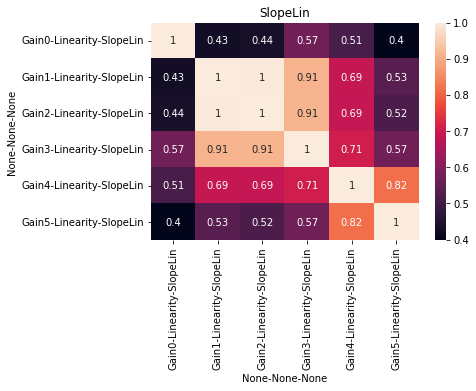

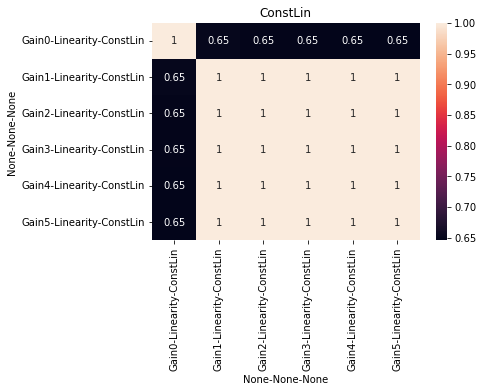

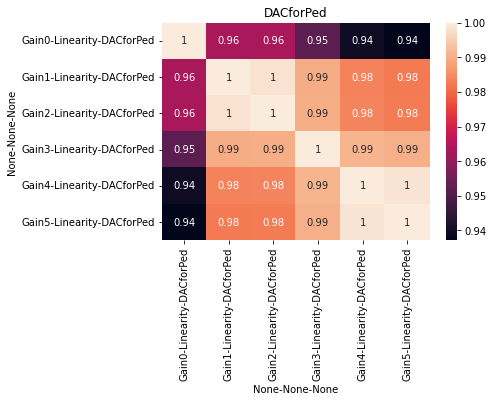

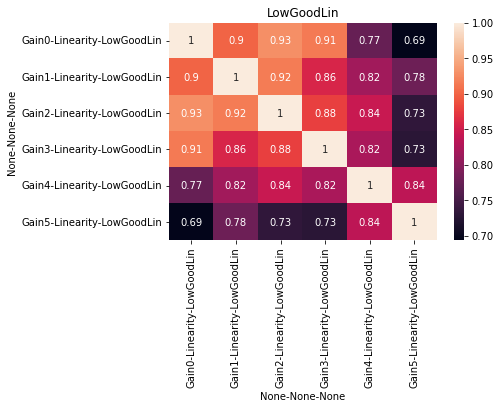

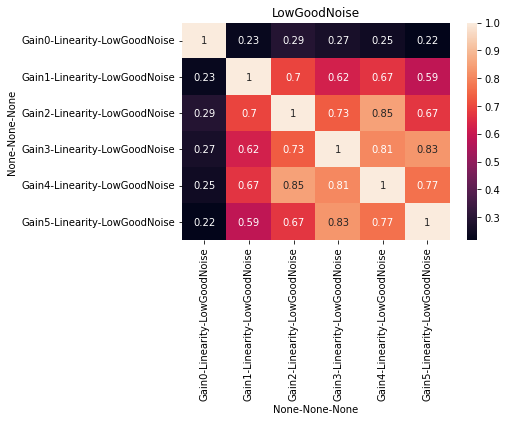

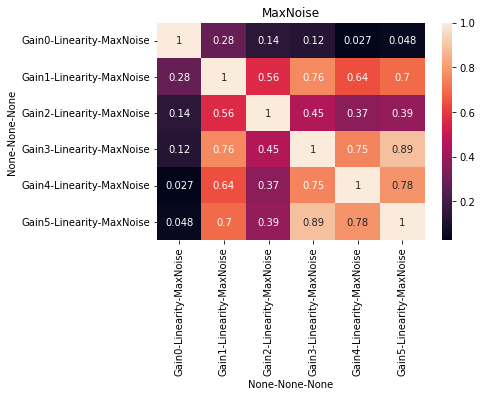

In [28]:
import seaborn as sns
gains = [0,1,2,3,4,5]
for subsubcol in Slow2.Gain0.Linearity.columns :
    features = []
    features = [(f'Gain{i}','Linearity',subsubcol) for i in gains]
    Corr = Slow2[features]
    ax = plt.axes()
    ax.set_title(subsubcol)
    sns.heatmap(Corr.corr(), annot=True)
    plt.show()



In [26]:
custom_filter = [('Combo',dict(labels_filter=AllFen2,
                               radio_categories=[dict(name = 'FEN2 LTT',indexes=FEN2_batch01_ids+FEN2_batch02_ids),
                                                 dict(name = 'TID',indexes=TID_ids),
                                                 dict(name = 'NIEL',indexes=NIEL_ids),
                                                 dict(name = 'FEN2 FAILED',indexes=FENICS2_fail),
                                                 ]))]

plot = FATL.FenBokehGrapher(Fast2[('LinearHGcor','SlopeInteg')].loc[FATL.dropOutSigma(FENICS2,Fast2[[('LinearHGcor','SlopeInteg')]],0.2)],
                            Fast2[('LinearHGcor','MaxNoisePed')].loc[FATL.dropOutSigma(FENICS2,Fast2[[('LinearHGcor','SlopeInteg')]],0.2)],
                            FENICS2.Board.version,FENICS2.Board.id,FENICS2.Board.burnTime,
                                colors=FENICS2.Board.burnTime ,labels=FENICS2.Board.id,
                                tooltips=[("card","FENICS0@version"),("id","@id"),("burnTime","@burnTime")])
                    
plot.plotter(plotType='scatter',filters=custom_filter,
                                axis_xlabel="'LinearLCHGcor','LowGoodLin'", axis_ylabel="'LinearLCHGcor','ShapeQuality'",
                                title="'LinearLCHGcor','LowGoodLin' vs 'LinearLCHGcor','ShapeQuality'",linear_fit=True,showGraph=True)


NameError: name 'sns' is not defined

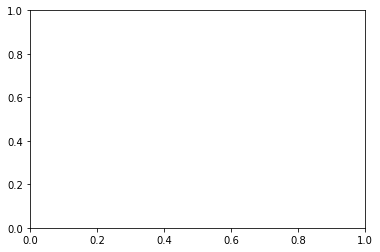

In [27]:
Channels = ['LinearHGcor','LinearHGunc','LinearLCHGcor','LinearSCLGunc','LinearLGcor','LinearLGunc']
features = []
for channel in Channels :
    ax = plt.axes()
    sns.heatmap(Fast2[channel].loc[FATL.dropOutSigma(FENICS2,Fast2[channel],1.5)].corr(), annot=True)
    ax.set_title(channel)
    plt.show()


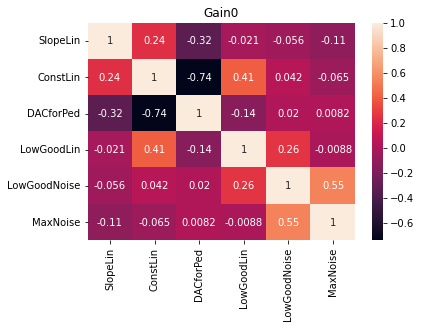

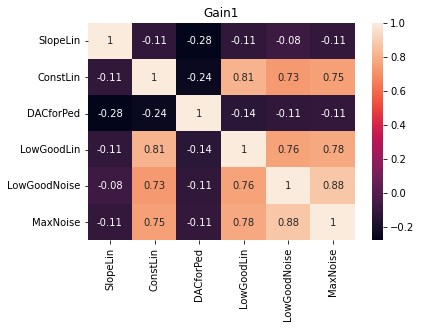

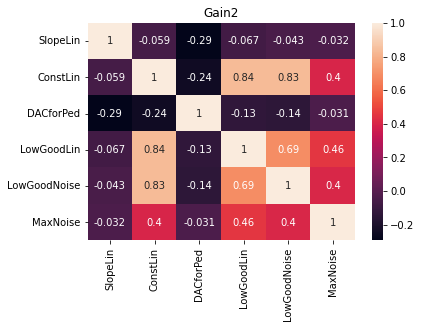

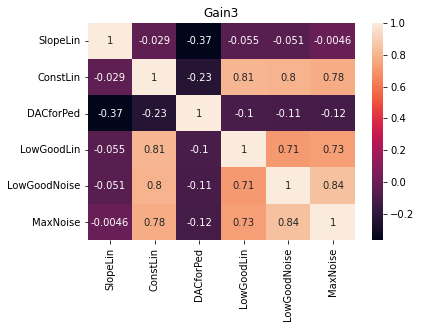

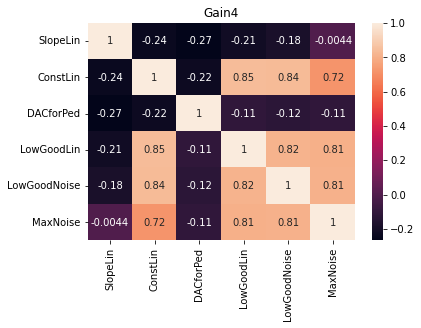

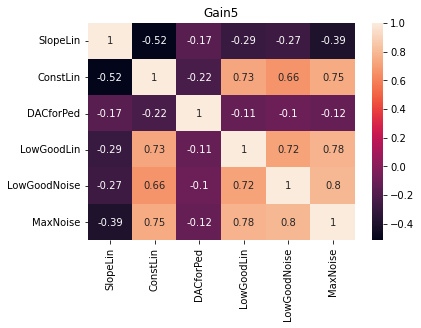

In [8]:
gains = [0,1,2,3,4,5]
features = []
for gain in gains :
    ax = plt.axes()
    sns.heatmap(Slow2[f'Gain{gain}']['Linearity'].corr(), annot=True)
    ax.set_title(f'Gain{gain}')
    plt.show()



In [34]:
features

[('Gain5', 'Linearity', 'SlopeLin'),
 ('Gain5', 'Linearity', 'ConstLin'),
 ('Gain5', 'Linearity', 'DACforPed'),
 ('Gain5', 'Linearity', 'LowGoodLin'),
 ('Gain5', 'Linearity', 'LowGoodNoise'),
 ('Gain5', 'Linearity', 'MaxNoise')]

IV.1 Correlations of all features : `Calculations`


In [11]:
corrThreshold = 0.8
corrMatch = {}
for id in filter_id :
    corrMatch[id] = (Fast2.loc[FENICS2[FENICS2.Board.id==id].index].corr()>corrThreshold).sum().sum()

IV.2 Correlations of all features : `Plots : w/out burns`


In [51]:

doMultiprocessing = False

corrThreshold = 0.8
def Fenics2Fast2Corr():
    FastCorrFilter = Fast2.corr()>corrThreshold
    for ii in range(len(FastCorrFilter.columns)):
        for jj in range(ii+1, len(FastCorrFilter.columns)):
            if FastCorrFilter.iloc[ii, jj] and FastCorrFilter.columns[ii] != FastCorrFilter.columns[jj]:
                FATL.FenCorr(FENICS2,Fast2,FastCorrFilter.columns[ii],FastCorrFilter.columns[jj]
                                        ,filter_id,LR=False,separate = False, burns=True , burns_filter = None,
                                        path ='/users/divers/atlas/sisaid/home2/fen2_output/correlation_nsep_wburn/fast')
                FATL.loadingBar(ii,len(FastCorrFilter.columns),suffix=str(FastCorrFilter.columns[ii]))

def Fenics2Slow2Corr():
    SlowCorrFilter = Slow2.corr()>corrThreshold
    for ii in range(len(SlowCorrFilter.columns)):
        for jj in range(ii+1, len(SlowCorrFilter.columns)):
            if SlowCorrFilter.iloc[ii, jj] and SlowCorrFilter.columns[ii] != SlowCorrFilter.columns[jj]:
                FATL.FenCorr(FENICS2,Slow2,SlowCorrFilter.columns[ii],SlowCorrFilter.columns[jj],
                                        filter_id,LR=False,separate = False, burns=True, burns_filter = None,
                                        path ='/users/divers/atlas/sisaid/home2/fen2_output/correlation_nsep_wburn/slow')
                FATL.loadingBar(ii,len(SlowCorrFilter.columns),suffix=str(SlowCorrFilter.columns[ii]))

if doMultiprocessing :
    if __name__ == '__main__':
      p1 = Process(target=Fenics2Fast2Corr)
      p1.start()
      p2 = Process(target=Fenics2Slow2Corr)
      p2.start()
      p1.join()
      p2.join()
else :
    Fenics2Fast2Corr()
    Fenics2Slow2Corr()
    doMultiprocessing = False

|                                                  | progress: 100%                                                     DONE 
|                                                  | progress: 100%                                                     DONE 


In [17]:
custom_filter = [('Combo',dict(labels_filter=AllFen2,
                               radio_categories=[dict(name = 'FEN2 LTT',indexes=FEN2_batch01_ids+FEN2_batch02_ids),
                                                 dict(name = 'TID',indexes=TID_ids),
                                                 dict(name = 'NIEL',indexes=NIEL_ids),
                                                 dict(name = 'FEN2 FAILED',indexes=FENICS2_fail),
                                                 ]))]

doMultiprocessing = False

corrThreshold = 0.8
def Fenics2Fast2Corr():
    FastCorrFilter = Fast2.corr()>corrThreshold
    for ii in range(len(FastCorrFilter.columns)):
        for jj in range(ii+1, len(FastCorrFilter.columns)):
            if FastCorrFilter.iloc[ii, jj] and FastCorrFilter.columns[ii] != FastCorrFilter.columns[jj]:
                plot = FATL.FenBokehGrapher(Fast2[FastCorrFilter.columns[ii]],Fast2[FastCorrFilter.columns[jj]],FENICS2.Board.version,FENICS2.Board.id,FENICS2.Board.burnTime,
                                colors=FENICS2.Board.burnTime ,labels=FENICS2.Board.id,
                                tooltips=[("card","FENICS0@version"),("id","@id"),("burnTime","@burnTime")])
                    
                plot.plotter(plotType='scatter',filters=custom_filter,
                                axis_xlabel=str(Fast2.columns[ii]), axis_ylabel=str(Fast2.columns[jj]),
                                title=f'{FastCorrFilter.columns[ii]} {FastCorrFilter.columns[jj]} correlation',linear_fit=False,showGraph=False)
                    
                plot.save_as_html(path=f'/users/divers/atlas/sisaid/home2/test1/correlation_nsep_wburn/fast/',filename=f'{Fast2.columns[ii]}_{Fast2.columns[jj]}_correlation')
    
    
def Fenics2Slow2Corr():
    SlowCorrFilter = Slow2.corr()>corrThreshold
    for ii in range(len(SlowCorrFilter.columns)):
        for jj in range(ii+1, len(SlowCorrFilter.columns)):
            if SlowCorrFilter.iloc[ii, jj] and SlowCorrFilter.columns[ii] != SlowCorrFilter.columns[jj]:
                plot = FATL.FenBokehGrapher(Slow2[SlowCorrFilter.columns[ii]],Slow2[SlowCorrFilter.columns[jj]],FENICS2.Board.version,FENICS2.Board.id,FENICS2.Board.burnTime,
                                colors=FENICS2.Board.burnTime ,labels=FENICS2.Board.id,
                                tooltips=[("card","FENICS0@version"),("id","@id"),("burnTime","@burnTime")])
                    
                plot.plotter(plotType='scatter',filters=custom_filter,
                                axis_xlabel=str(SlowCorrFilter.columns[ii]), axis_ylabel=str(SlowCorrFilter.columns[jj]),
                                title=f'{SlowCorrFilter.columns[ii]} {SlowCorrFilter.columns[jj]} correlation',linear_fit=False,showGraph=False)
                    
                plot.save_as_html(path=f'/users/divers/atlas/sisaid/home2/test1/correlation_nsep_wburn/slow/',filename=f'{Slow2.columns[ii]}_{Slow2.columns[jj]}_correlation')
    
    
if doMultiprocessing :
    if __name__ == '__main__':
      p1 = Process(target=Fenics2Fast2Corr)
      p1.start()
      p2 = Process(target=Fenics2Slow2Corr)
      p2.start()
      p1.join()
      p2.join()
else :
    Fenics2Fast2Corr()
    Fenics2Slow2Corr()
    doMultiprocessing = False

IV.3.a Correlations per FENICS card of all features : `Plots : w/out burns`

In [ ]:

doMultiprocessing = False

def Fast2CorrPerFenics2():
    for progress,id in enumerate(filter_id) :
        FastCorrFilter = Fast2.loc[FENICS2[FENICS2.Board.id==id].index].corr()>corrThreshold
        for ii in range(len(FastCorrFilter.columns)):
            FATL.loadingBar(progress,len(filter_id),suffix='FENICS2 ' + str(id) +' : '+ str(FastCorrFilter.columns[ii]))
            for jj in range(ii+1, len(FastCorrFilter.columns)):
                if FastCorrFilter.iloc[ii, jj] and FastCorrFilter.columns[ii] != FastCorrFilter.columns[jj]:
                    FATL.FenCorr(FENICS2,Fast2,FastCorrFilter.columns[ii],FastCorrFilter.columns[jj],
                                            [id],burns = True,path =f'/users/divers/atlas/sisaid/home2/fen2_output/correlation_per_id/{str(id)}/fast')
                    FATL.loadingBar(progress,len(filter_id),suffix='FENICS2 ' + str(id) +' : '+ str(FastCorrFilter.columns[ii]))
def Slow2CorrPerFenics2():
    for progress,id in enumerate(filter_id) :                  
        SlowCorrFilter = Slow2.loc[FENICS2[FENICS2.Board.id==id].index].corr()>corrThreshold
        for ii in range(len(SlowCorrFilter.columns)):
            for jj in range(ii+1, len(SlowCorrFilter.columns)):
                if SlowCorrFilter.iloc[ii, jj] and SlowCorrFilter.columns[ii] != SlowCorrFilter.columns[jj]:
                    FATL.FenCorr(FENICS2,Slow2,SlowCorrFilter.columns[ii],SlowCorrFilter.columns[jj],
                                            [id],burns = True,path =f'/users/divers/atlas/sisaid/home2/fen2_output/correlation_per_id/{str(id)}/slow')         
                    FATL.loadingBar(progress,len(filter_id),suffix='FENICS2 ' + str(id) +' : '+ str(SlowCorrFilter.columns[ii]))


if doMultiprocessing :
    if __name__ == '__main__':
      p1 = Process(target=Fast2CorrPerFenics2)
      p1.start()
      p2 = Process(target=Slow2CorrPerFenics2)
      p2.start()
      p1.join()
      p2.join()
      doMultiprocessing = False
else :
    Fast2CorrPerFenics2()
    Slow2CorrPerFenics2()

# **V. Evolution animation**

In [ ]:
filter_id = [29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
for frame in FENICS2.Board.burnTime[FENICS2.Board.id==29].unique() :
    FATL.FenAnimate(FENICS2,Fast2,filter_id,('NoiseLGIG6','Sigma'),('NoiseLGIG6','StdDev'),frame)

=============================================================
=

**<center><h1>FENICS 1 & 2</h1></center>**

=============================================================
=

In [13]:
FENICS12 = FENICS.append(FENICS2,ignore_index=True)
Fast12 = Fast.append(Fast2,ignore_index=True)
Slow12 = Slow.append(Slow2,ignore_index=True)

In [58]:
Fast12[~(FENICS12.Board.id == 14) | (FENICS12.Board.id == 8) ].describe()

LinearHGcor                                                             \
         SlopeAmp   SlopeInteg  LowGoodLin LowGoodNoisePed LowGoodNoiseInteg   
count  938.000000   938.000000  938.000000      938.000000        938.000000   
mean   152.814826  7397.323980    0.221418        0.329574          0.075690   
std      2.563722    83.147504    0.141727        0.006617          0.003416   
min    140.930988  6963.748807    0.048382        0.280653          0.072198   
25%    151.535437  7353.043570    0.150824        0.329858          0.074728   
50%    152.851798  7408.908370    0.178679        0.330287          0.075372   
75%    153.854353  7447.744440    0.254978        0.330705          0.075810   
max    173.237663  7741.587624    1.122308        0.357126          0.102300   

                                           LinearHGunc               ...  \
      MaxNoisePed MaxNoiseAmp ShapeQuality    SlopeAmp   SlopeInteg  ...   
count  938.000000  938.000000   938.000000  938.000000   938.000000  ...   
mean    16.351561   23.459852     1.834293  152.760656  7394.741624  ...   
std      0.469736    1.586708     0.670859    2.545194    82.785381  ...   
min     14.186104   18.810206     0.594463  140.925689  6964.734382  ...   
25%     16.119818   22.439621     1.384682  151.476760  7349.263185  ...   
50%     16.322205   23.242013     1.685868  152.823295  7407.159753  ...   
75%     16.528692   24.294445     2.192754  153.786435  7443.583668  ...   
max     20.607260   33.628465     5.376413  173.016334  7736.564581  ...   

       NoiseLGIG1              NoiseLGIG2                                      \
             Mean      StdDev          Mu       Sigma        Mean      StdDev   
count  938.000000  938.000000  938.000000  938.000000  938.000000  938.000000   
mean   113.312562    1.082736  113.314477    1.052544  113.314439    1.082869   
std     11.729299    0.055677   11.728497    0.025195   11.727764    0.055449   
min     96.125617    0.995465   96.140104    0.992678   96.140762    0.994376   
25%    101.390530    1.035029  101.315021    1.031792  101.313172    1.034350   
50%    114.883242    1.065179  114.891366    1.052291  114.891106    1.065984   
75%    122.807553    1.127714  122.841598    1.068308  122.841276    1.127447   
max    135.456483    1.245651  135.429004    1.114969  135.418850    1.250565   

       NoiseLGIG6                                      
               Mu       Sigma        Mean      StdDev  
count  938.000000  938.000000  938.000000  938.000000  
mean   113.316082    1.052097  113.316118    1.082541  
std     11.732242    0.025206   11.731569    0.055270  
min     96.165263    0.993971   96.165487    0.995887  
25%    101.350139    1.031481  101.351039    1.034531  
50%    114.892610    1.052443  114.892542    1.065669  
75%    122.827557    1.067245  122.827019    1.126725  
max    135.472490    1.154106  135.468817    1.258108  

[8 rows x 80 columns]